In [4]:
import wget
wget.download('https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv')   

'COVID-19_casus_landelijk.csv'

In [6]:
import pandas as pd
data = pd.read_csv('COVID-19_casus_landelijk.csv',sep=';',index_col='Date_statistics',parse_dates=True)
data['n']=1
data.head()

,Date_file,Date_statistics_type,Agegroup,Sex,Province,Hospital_admission,Deceased,Week_of_death,Municipal_health_service,n
Date_statistics,,,,,,,,,,
2020-01-01,2021-01-10 10:00:00,DOO,40-49,Female,Noord-Holland,No,No,NaN,GGD Amsterdam,1
2020-01-01,2021-01-10 10:00:00,DOO,50-59,Male,Gelderland,No,No,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...,1
2020-01-01,2021-01-10 10:00:00,DOO,20-29,Female,Zuid-Holland,No,No,NaN,GGD Hollands-Midden,1
2020-01-02,2021-01-10 10:00:00,DOO,70-79,Female,Noord-Holland,No,No,NaN,GGD Gooi en Vechtstreek,1
2020-01-04,2021-01-10 10:00:00,DOO,10-19,Female,Gelderland,Unknown,No,NaN,GGD Gelderland-Zuid,1


Text(0.5, 0, 'datum')

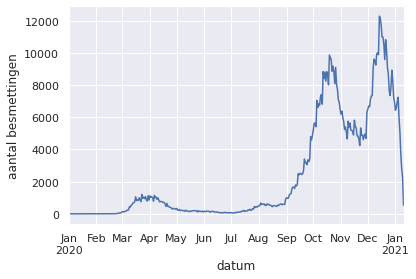

In [8]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
count=data['n']
daily=count.resample('D').sum()
daily.plot()
plt.ylabel('aantal positieve tests')
plt.xlabel('datum')

Text(0.5, 0, 'datum')

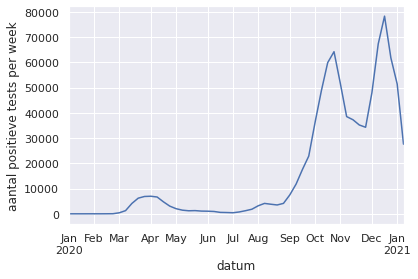

In [15]:
weekly=count.resample('W').sum()
weekly.plot()
plt.ylabel('aantal positieve tests per week')
plt.xlabel('datum')

Text(0.5, 0, 'datum')

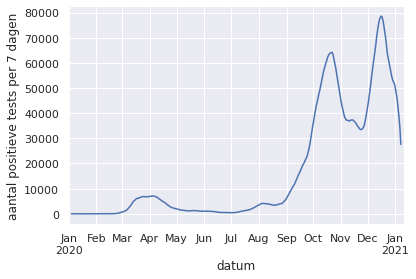

In [14]:
daily.rolling(7,center=True).sum().plot()
plt.ylabel('aantal positieve tests per 7 dagen')
plt.xlabel('datum')

Text(0.5, 1.0, 'Zuid-Holland')

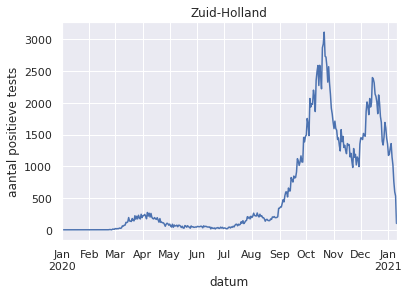

In [21]:
province='Zuid-Holland'
prov_data=data[data.Province == province]
prov_count=prov_data['n']
dailyprov=prov_count.resample('D').sum()
dailyprov.plot()
plt.ylabel('aantal positieve tests')
plt.xlabel('datum')
plt.title(province)